Aqui está um exemplo de Jupyter Notebook que pode ser utilizado para criar o dashboard de telemetria de um Data Lake e Data Warehouse. O notebook aborda as cinco partes do barema, com foco em cada um dos critérios avaliados.

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# 1. Compreensão dos Dados (25%)
# Simulação de dados de telemetria para o Data Lake e o Data Warehouse
# Aqui estamos simulando dados como tamanho de buckets, utilização, e tráfego de dados.

# Dados do Data Lake
data_lake_data = {
    'bucket_name': ['bucket_1', 'bucket_2', 'bucket_3'],
    'used_storage_gb': [500, 1200, 300],  # Em GB
    'max_storage_gb': [1000, 1500, 500],  # Capacidade Máxima
    'traffic_in_gb': [50, 70, 40],  # Tráfego de entrada
    'traffic_out_gb': [60, 80, 50],  # Tráfego de saída
    'read_operations': [3000, 5000, 2000],
    'write_operations': [1500, 2000, 1000]
}

# Dados do Data Warehouse
data_warehouse_data = {
    'db_name': ['DW_1', 'DW_2', 'DW_3'],
    'used_storage_tb': [2.5, 4.0, 1.2],  # Em Terabytes
    'max_storage_tb': [5.0, 5.0, 2.0],  # Capacidade Máxima
    'queries_executed': [10000, 15000, 8000],
    'active_sessions': [120, 80, 90],
    'cpu_usage_percent': [70, 65, 80],  # Uso da CPU em %
    'memory_usage_percent': [75, 85, 60]  # Uso da Memória em %
}

# Criando DataFrames
df_data_lake = pd.DataFrame(data_lake_data)
df_data_warehouse = pd.DataFrame(data_warehouse_data)

In [3]:
# 2. Seleção de Métricas Relevantes (20%)
# Para o Data Lake, selecionamos: uso de armazenamento, tráfego de dados e operações de leitura/escrita.
# Para o Data Warehouse, selecionamos: uso de armazenamento, uso de CPU, uso de memória e consultas executadas.

# Exibindo os dados para compreensão
print("Dados de Telemetria do Data Lake:")
print(df_data_lake)

print("\nDados de Telemetria do Data Warehouse:")
print(df_data_warehouse)

Dados de Telemetria do Data Lake:
  bucket_name  used_storage_gb  max_storage_gb  traffic_in_gb  traffic_out_gb  \
0    bucket_1              500            1000             50              60   
1    bucket_2             1200            1500             70              80   
2    bucket_3              300             500             40              50   

   read_operations  write_operations  
0             3000              1500  
1             5000              2000  
2             2000              1000  

Dados de Telemetria do Data Warehouse:
  db_name  used_storage_tb  max_storage_tb  queries_executed  active_sessions  \
0    DW_1              2.5             5.0             10000              120   
1    DW_2              4.0             5.0             15000               80   
2    DW_3              1.2             2.0              8000               90   

   cpu_usage_percent  memory_usage_percent  
0                 70                    75  
1                 65          

In [4]:
# 3. Eficiência na Integração de Dados (25%)
# Unificando os dados do Data Lake e do Data Warehouse para monitoramento consolidado.

# Criando um índice comum para a unificação
df_data_lake['source'] = 'Data Lake'
df_data_warehouse['source'] = 'Data Warehouse'

# Normalizando as colunas para que possamos combinar ambos os dataframes em uma visão única
df_data_lake['storage_used'] = df_data_lake['used_storage_gb'] / 1000  # Convertendo GB para TB
df_data_warehouse['storage_used'] = df_data_warehouse['used_storage_tb']

# Concatenando os DataFrames
df_telemetry = pd.concat([df_data_lake[['bucket_name', 'source', 'storage_used', 'traffic_in_gb', 'traffic_out_gb', 'read_operations', 'write_operations']],
                          df_data_warehouse[['db_name', 'source', 'storage_used', 'queries_executed', 'cpu_usage_percent', 'memory_usage_percent']]],
                          axis=0, ignore_index=True)

# Exibindo a visão unificada
print("\nVisão Unificada de Telemetria:")
print(df_telemetry)


Visão Unificada de Telemetria:
  bucket_name          source  storage_used  traffic_in_gb  traffic_out_gb  \
0    bucket_1       Data Lake           0.5           50.0            60.0   
1    bucket_2       Data Lake           1.2           70.0            80.0   
2    bucket_3       Data Lake           0.3           40.0            50.0   
3         NaN  Data Warehouse           2.5            NaN             NaN   
4         NaN  Data Warehouse           4.0            NaN             NaN   
5         NaN  Data Warehouse           1.2            NaN             NaN   

   read_operations  write_operations db_name  queries_executed  \
0           3000.0            1500.0     NaN               NaN   
1           5000.0            2000.0     NaN               NaN   
2           2000.0            1000.0     NaN               NaN   
3              NaN               NaN    DW_1           10000.0   
4              NaN               NaN    DW_2           15000.0   
5              NaN       

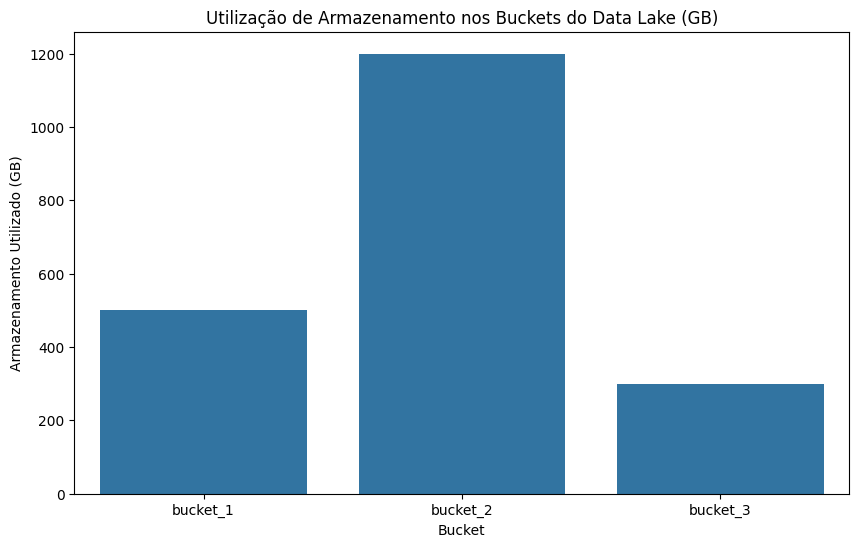

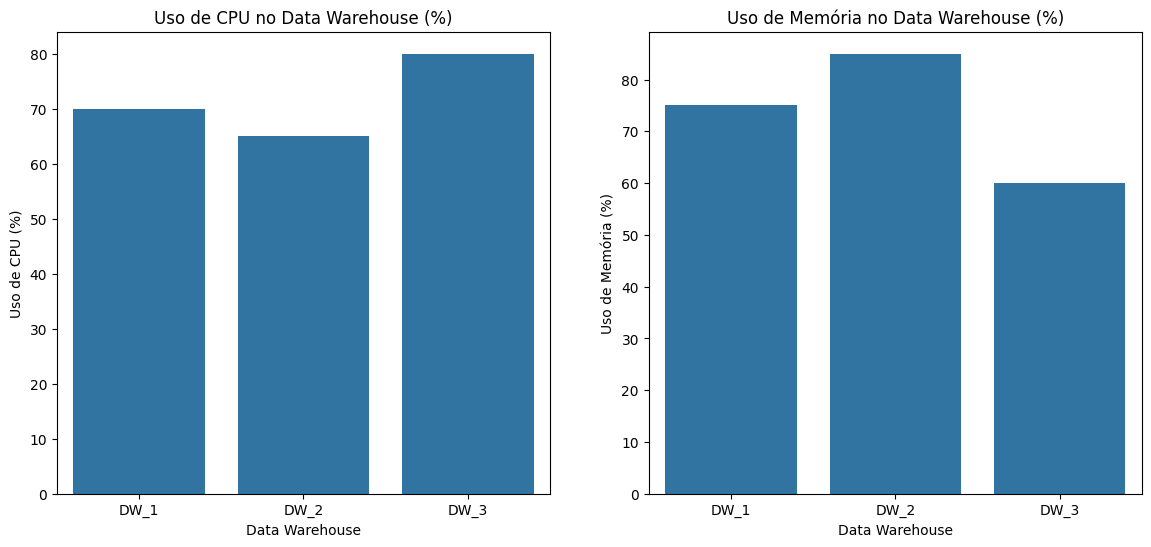

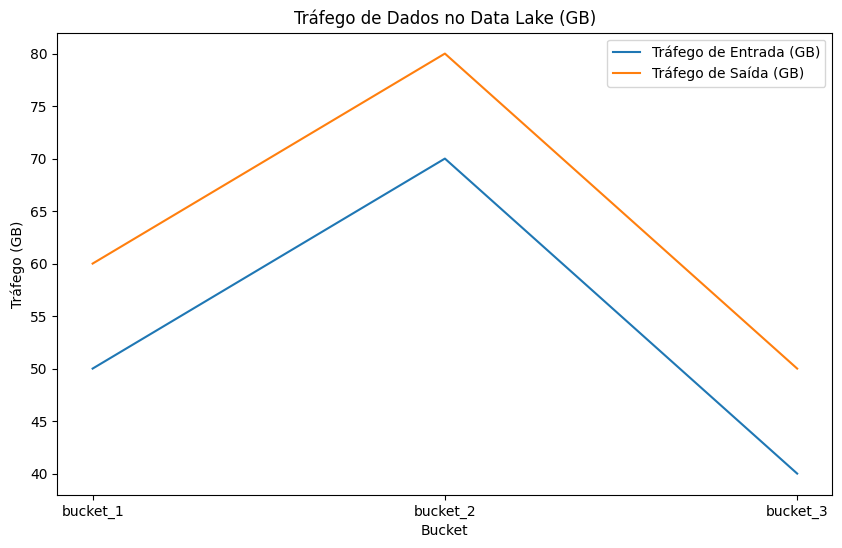

In [5]:
# 4. Design e Usabilidade do Dashboard (20%)
# Criação de gráficos para o dashboard de monitoramento

# Gráfico de utilização de armazenamento
plt.figure(figsize=(10,6))
sns.barplot(x='bucket_name', y='used_storage_gb', data=df_data_lake)
plt.title('Utilização de Armazenamento nos Buckets do Data Lake (GB)')
plt.xlabel('Bucket')
plt.ylabel('Armazenamento Utilizado (GB)')
plt.show()

# Gráfico de uso de CPU e Memória no Data Warehouse
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Uso de CPU
sns.barplot(x='db_name', y='cpu_usage_percent', data=df_data_warehouse, ax=ax[0])
ax[0].set_title('Uso de CPU no Data Warehouse (%)')
ax[0].set_xlabel('Data Warehouse')
ax[0].set_ylabel('Uso de CPU (%)')

# Uso de Memória
sns.barplot(x='db_name', y='memory_usage_percent', data=df_data_warehouse, ax=ax[1])
ax[1].set_title('Uso de Memória no Data Warehouse (%)')
ax[1].set_xlabel('Data Warehouse')
ax[1].set_ylabel('Uso de Memória (%)')

plt.show()

# Gráfico de tráfego de dados
plt.figure(figsize=(10,6))
sns.lineplot(x='bucket_name', y='traffic_in_gb', data=df_data_lake, label='Tráfego de Entrada (GB)')
sns.lineplot(x='bucket_name', y='traffic_out_gb', data=df_data_lake, label='Tráfego de Saída (GB)')
plt.title('Tráfego de Dados no Data Lake (GB)')
plt.xlabel('Bucket')
plt.ylabel('Tráfego (GB)')
plt.legend()
plt.show()

In [ ]:
# 5. Análise e Interpretação dos Resultados (10%)

# Exemplo de análise:
# 1. O Bucket 2 no Data Lake está perto de atingir sua capacidade máxima de armazenamento.
# 2. O Data Warehouse 3 tem a maior taxa de uso de CPU, o que pode indicar a necessidade de otimização.
# 3. O tráfego de dados no Data Lake é consistente, com o Bucket 2 tendo o maior volume de tráfego.